## Визуализация для презентации данных
Во-первых, кроме привычных вам графиков существует еще огромное множество всего (и некоторые вещи работают гораздо лучше привычных нам). Python умеет строить и сложные штуки.
Есть несколько классных сайтов, которые помогают выбрать подходящий график для ваших данных:

https://www.data-to-viz.com/

https://datavizproject.com/

https://datavizcatalogue.com/RU/

Сегодня мы будем работать с несколькими датасетами, чтобы посмотреть разные виды графиков.


In [1]:
# наша основная библиотека для визуализаций
import matplotlib.pyplot as plt  
import pandas as pd 
import numpy as np

# магическая функция, чтобы графики отображались в блокноте под ячейками
%matplotlib inline  

# Линейный график (trend line, line plot): кто живет в лесу?

Сначала будем работать с синтетическим набором данных "Кто живет в лесу". У нас есть переменная год и переменные, которые обозначают, сколько в этом году было в лесу зайцев, рысей и морковок.

In [2]:
# если файл не лежит в рабочей директории jupyter, то не забудьте прописать полный путь к нему
# также обратите внимание, что данные в файле разделены не запятыми, а табуляцией - добавим параметр, который
# сообщает пандас нужный знак разделителя
forest = pd.read_csv('populations.txt', sep='\t')
forest.head()

,year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600


In [3]:
forest.shape

(21, 4)

Давайте для начала посмотрим как выглядит объект, который создает matplotlib И разберемся, как строить в нем графики.
Первый вариант создания графика - plt.plot(), которому мы просто можем передать два аргумента - что положить на ось x, а что на y. Если у вас переменные в числовом формате, то без проблем получите линейный график (line plot)


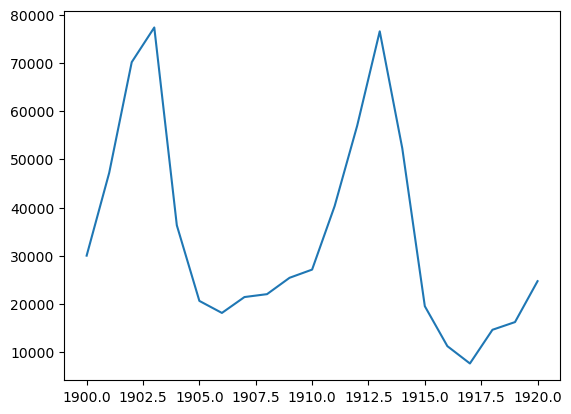

In [4]:
plt.plot(forest.year, forest.hare); # первый аргумент - ось x, второй аргумент - ось y.

Чтобы построить столбчатую диаграмму - меняем функцию plot на bar. 
Все виды графиков и функций можно найти в документации matplotlib 
https://matplotlib.org/api/pyplot_summary.html

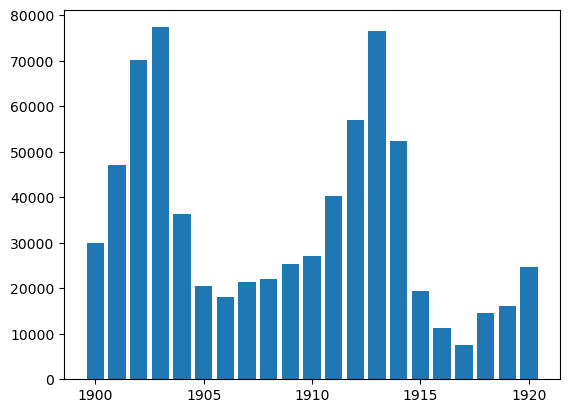

In [5]:
plt.bar(forest.year, forest.hare);

Давайте вернемся к нашему линейному график, сохраним его в переменной и попробуем сделать его посимпатичней. 

В идеальной вселенной мы создаем графики функцией subplots (которая может, например, создать систему из нескольких графиков) и сложить то, что она генириует в две переменные. Обычно их называют fig и ax.

Переменная fig (или как вы ее назвали. Тут главное, что это первая переменная, которую вы определили) отвечает за график вцелом. Воспринимайте ее как файл, который хранит график как картинку.

Переменная ax (так, которую мы определяем второй) - это ось координат, на которой мы собственно строим график. Мы можем настраивать внешний вид этого объекта (потому что все элементы графика хранятся как раз в ней).


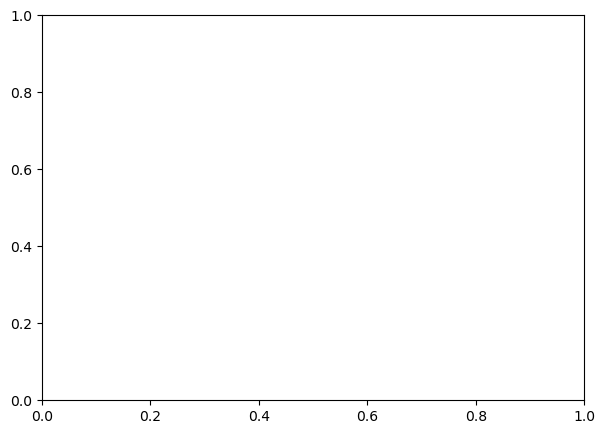

In [6]:
fig, ax = plt.subplots(1,1, figsize=(7,5)) # создали объект из 1 ряда 1 колонки графика (что сюрприз - один график!)
                                           # Размер - по сути это размер нашего прямоугольника в неочевидных единицах. 
                                           # Какой размер удачный? экспериментируйте!

Выше мы создали пустую шкалу координат. Давайте теперь попробуем наложить на нее график.

In [7]:
forest.head()  # вспомнили, какие переменные у нас есть.

,year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600


Посмотрим, как выглядит наш график по умолчанию.

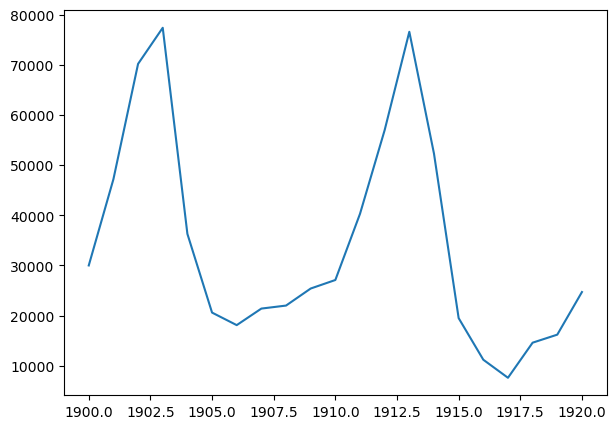

In [8]:
fig, ax = plt.subplots(1,1, figsize=(7,5)) # создаем переменную заново, чтобы вы точно стирали то, что в ней лежит на каждом шаге,
                                           # если вы захотите внести измения в код
ax.plot(forest.year, forest.hare)  # обратите внимание - график мы теперь строим как метод объекта ax. 
                                   # Ниже все модификации графика тоже применяем к объекту.


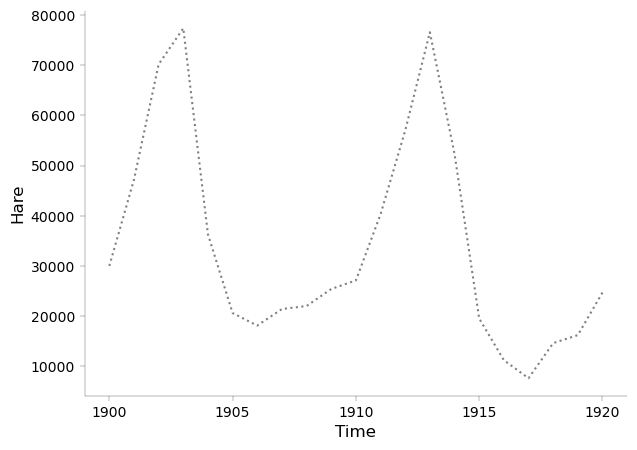

In [9]:
fig, ax = plt.subplots(1,1, figsize=(7,5)) 

# параметры самого графика (цвет линии, стиль и т.д.) определяем как параметры в методе plot()
# меняем цвет и стиль линии на пунктир. Matplotlib знает некоторые стандартные цвета, и их можно задать прямо словом
# так же можно передать hex цвет. Например, #8c92ac
ax.plot(forest.year, forest.hare, color = 'grey', ls = ':')  


# если вы обратили внимание, то в нашем самом первом графике шкала с годами сломамлась и стала float. Matplotlib принудительно 
# делает x непрерывной переменной для линейного графика. Мы хотим оставить шкалу год в целых числах.
ax.locator_params(integer=True) 

# называем шкалы x и y, выбираем размер шрифта.
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Hare', fontsize=12)

# делаем правую и верхнюю границу графика невидимыми
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# делаем засечки на шкалах x и y потоньше
ax.xaxis.set_tick_params(width=0.2)
ax.yaxis.set_tick_params(width=0.2)

# уменьшаем толщину оставших границ графика с помощью цикла (можно и без цикла отдельной строкой для каждой границы, как делали выше)
for spine in ['bottom','left']:
    ax.spines[spine].set_linewidth(0.2)

Больше видов графиков и параметров, которые мы можем изменять - в документации Matplotlib. 

## Упражнение
Сейчас мы посмотрим, как создавать систему графиков и попробуем построить тренды для всех обитателей нашего леса.


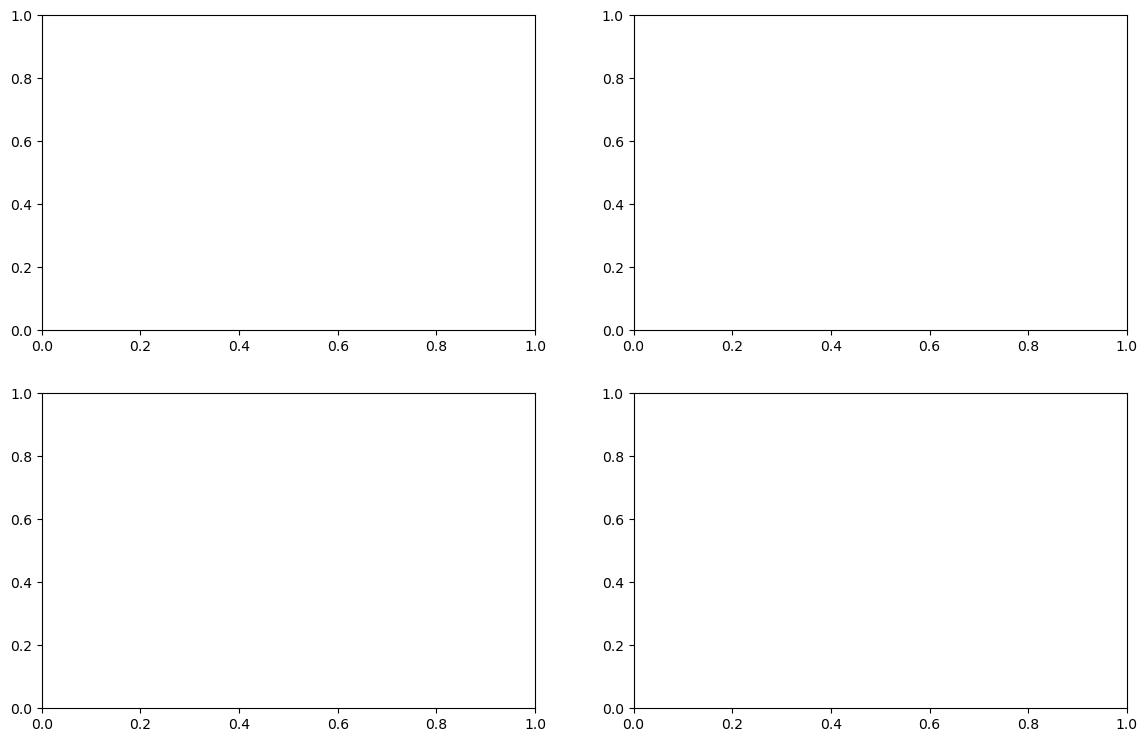

In [10]:
fig, ax = plt.subplots(2,2, figsize=(14,9)) # увеличиваем количество объектов до двух рядов и двух колонок. Также увеличиваем размер изображения.

Класс, теперь у нас есть четыре графика. Теперь объект ax - это некоторая матрица (или вложенный список - как вам удобнее воспринимать). И чтобы обратиться к каждому графику, нужно обратиться к нему по индексу.


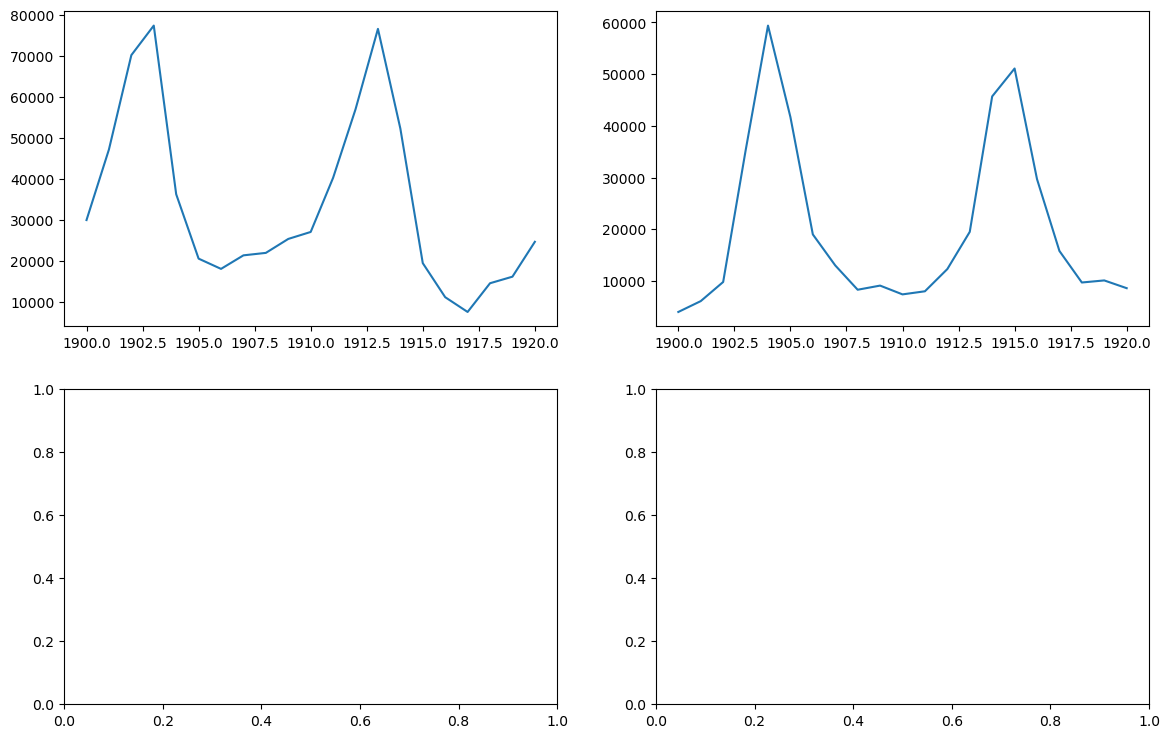

In [13]:
fig, ax = plt.subplots(2,2, figsize=(14,9))
ax[0][0].plot(forest.year, forest.hare)  # Обращаемся к первому графику в первой колонке.
ax[0][1].plot(forest.year, forest.lynx) 

Ниже посмотрим как с помощью цикла for можно применить какую-то модификацию ко всем графикам системы.

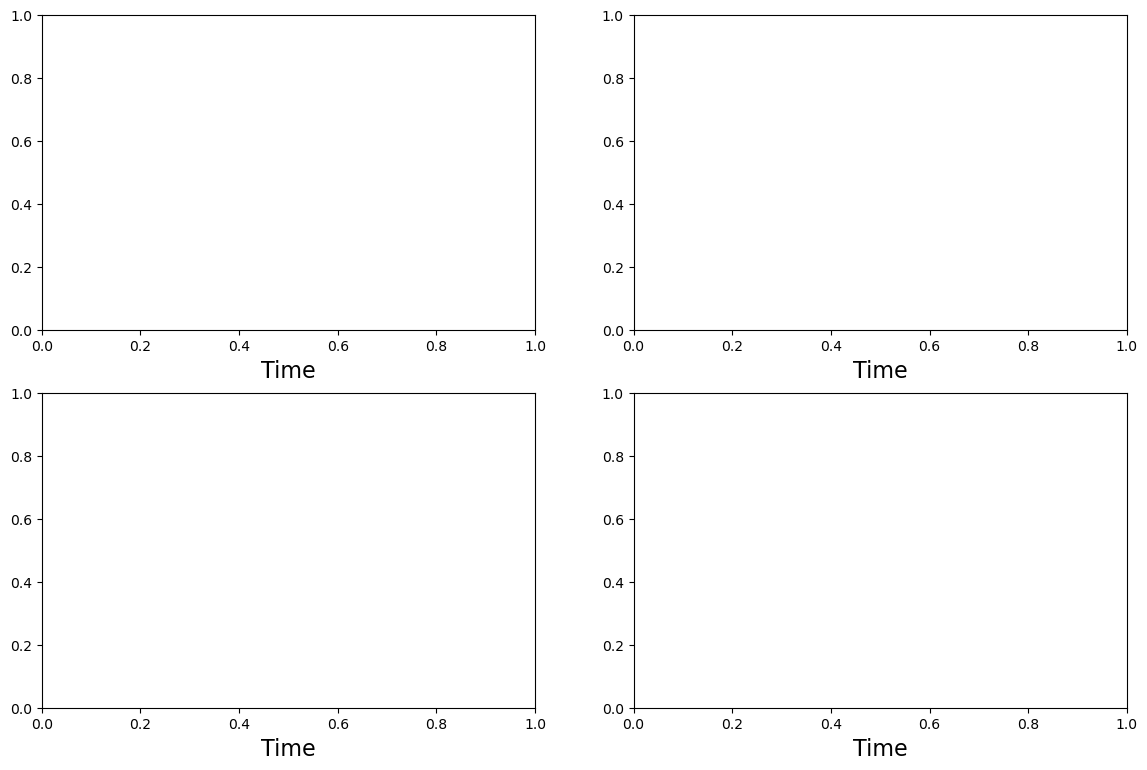

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(14,9))

for x in range(2):
    for y in range(2):
        ax[x][y].set_xlabel('Time', fontsize = 16)

# Мультивариативный график рассеяния (multivariate scatter plot): преступления в США

Сейчас будем работать с наборам данных, который содержит информацию о количестве преступлений в штатах США в 2005 году. 

In [15]:
crimes = pd.read_csv('crimeRatesByState2005.tsv', sep='\t')  # тут разделитель - тоже табуляция
crimes.head()

,state,murder,Forcible_rate,Robbery,aggravated_assult,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4627851
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,686293
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,6500180
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2855390
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,36756666


In [16]:
crimes.shape

(50, 9)

Давайте начнем с графика с двумя переменным. Тут все просто - непрерывная переменная по x, непрерывная переменная по y: а точка на пересечении значений x и y - место нашего штата в этой системе  координат. Давайте для начала построим график для убийств и ограблений. График рассеяния можно использовать и для категориальных переменных - посмотрим на другом примере.

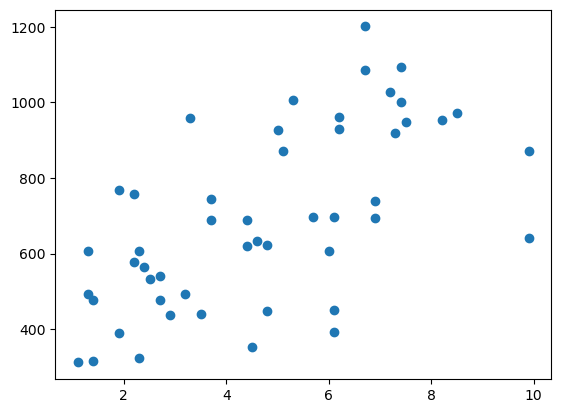

In [17]:
fig, ax = plt.subplots()  # если нужно создать один график, то можем не указывать количество в аргументах
ax.scatter(crimes['murder'], crimes['burglary']);  # вместо метода plot используем scatter

Попробуйте проинтерпретировать график выше. Дальше мы попробуем закодировать в нем еще две переменные. Есть идеи как?

Мульвариативный график - это такой график, из которого мы можем считать значения для более чем двух переменных. Самый простой способ закодировать дополнительную информацию - цыет и размер точки. Давайте добавим значение переменной population (размер населения штата) на график как размер точки.

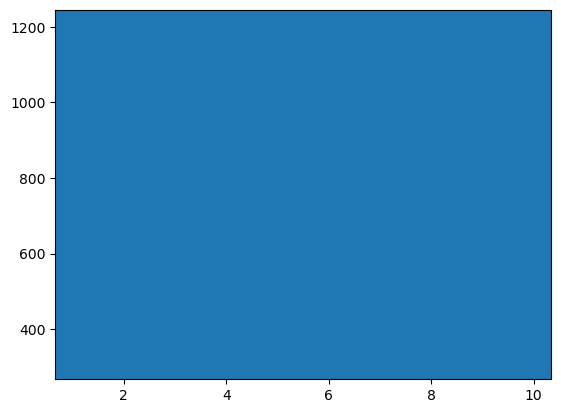

In [18]:
fig, ax = plt.subplots()

# добавляем параметр s (size) и говорим, какая переменная будет за него отвечать
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population'])  


Воу! Размер населения такой большой, что точка захватила всю область координат. Давайте попробуем нашу переменную масштабировать - нам же важны относительные размеры штатов относительно друг друга, а не абсолютные значения. Значения маштабирования тоже выбираем экспериментально: то, что лучше выглядит и более информативно.

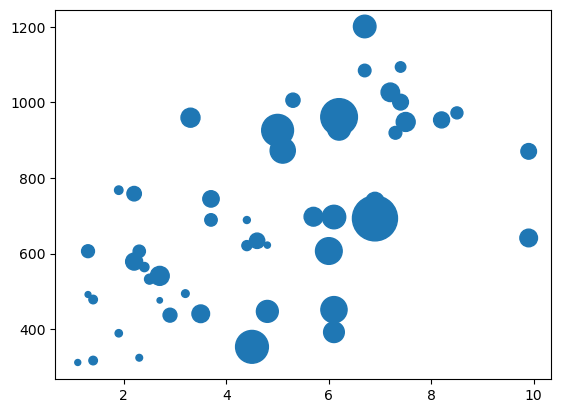

In [19]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000)

Класс, только некоторые точки слились. Давайте добавим параметр прозрачности, чтобы было видно, где они накладываются друг на друга.

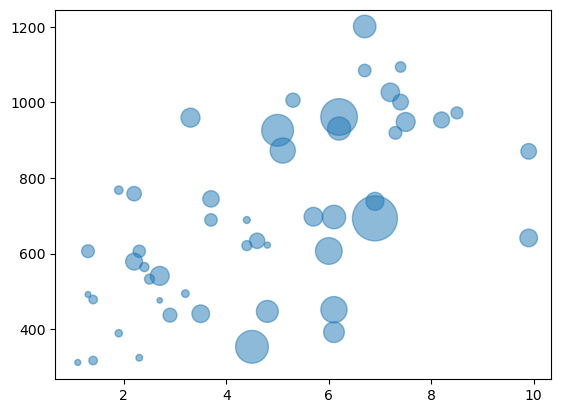

In [20]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'],
           crimes['burglary'],
           s=crimes['population'] / 35000,
           alpha=0.5)  # параметр alpha задает прозрачность точки от 0 до 1

Давайте попробуем проинтерпретировать этот график. А потом добавим еще какую-нибудь переменную в виде цвета.

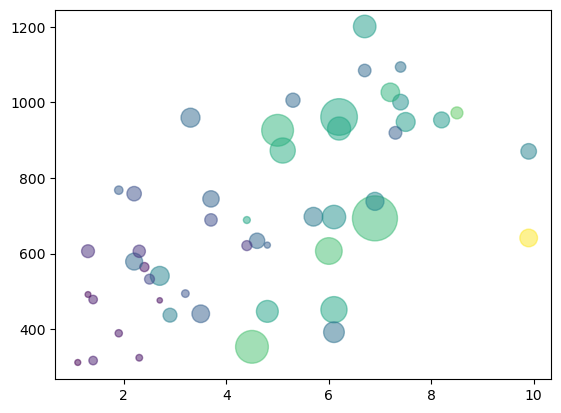

In [21]:
fig, ax = plt.subplots()
ax.scatter(
    crimes['murder'],
    crimes['burglary'],
    s=crimes['population'] / 35000,
    alpha=0.5,
    c=crimes['Robbery']
)  # задаем новый аргумент c (color) и присваиваем ему значение переменной

Осталось узнать, что значит какой цвет. Для этого нужно сохранить график в переменную и передать ее как аргумент функции colorbar().
Также можем поменять цветовую шкалу с помощью аргумента cmap (какие цветовые картыесть в matplotlib? Гуглим документацию!).

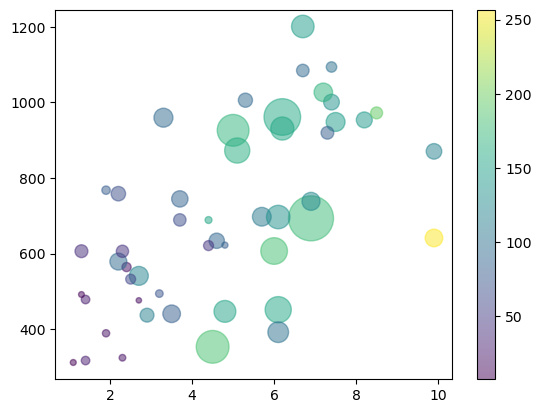

In [22]:
fig, ax = plt.subplots()
color_graph = ax.scatter(crimes['murder'],
                         crimes['burglary'],
                         s=crimes['population'] / 35000,
                         alpha=0.5,
                         cmap='viridis',
                         c=crimes['Robbery'])
plt.colorbar(color_graph);

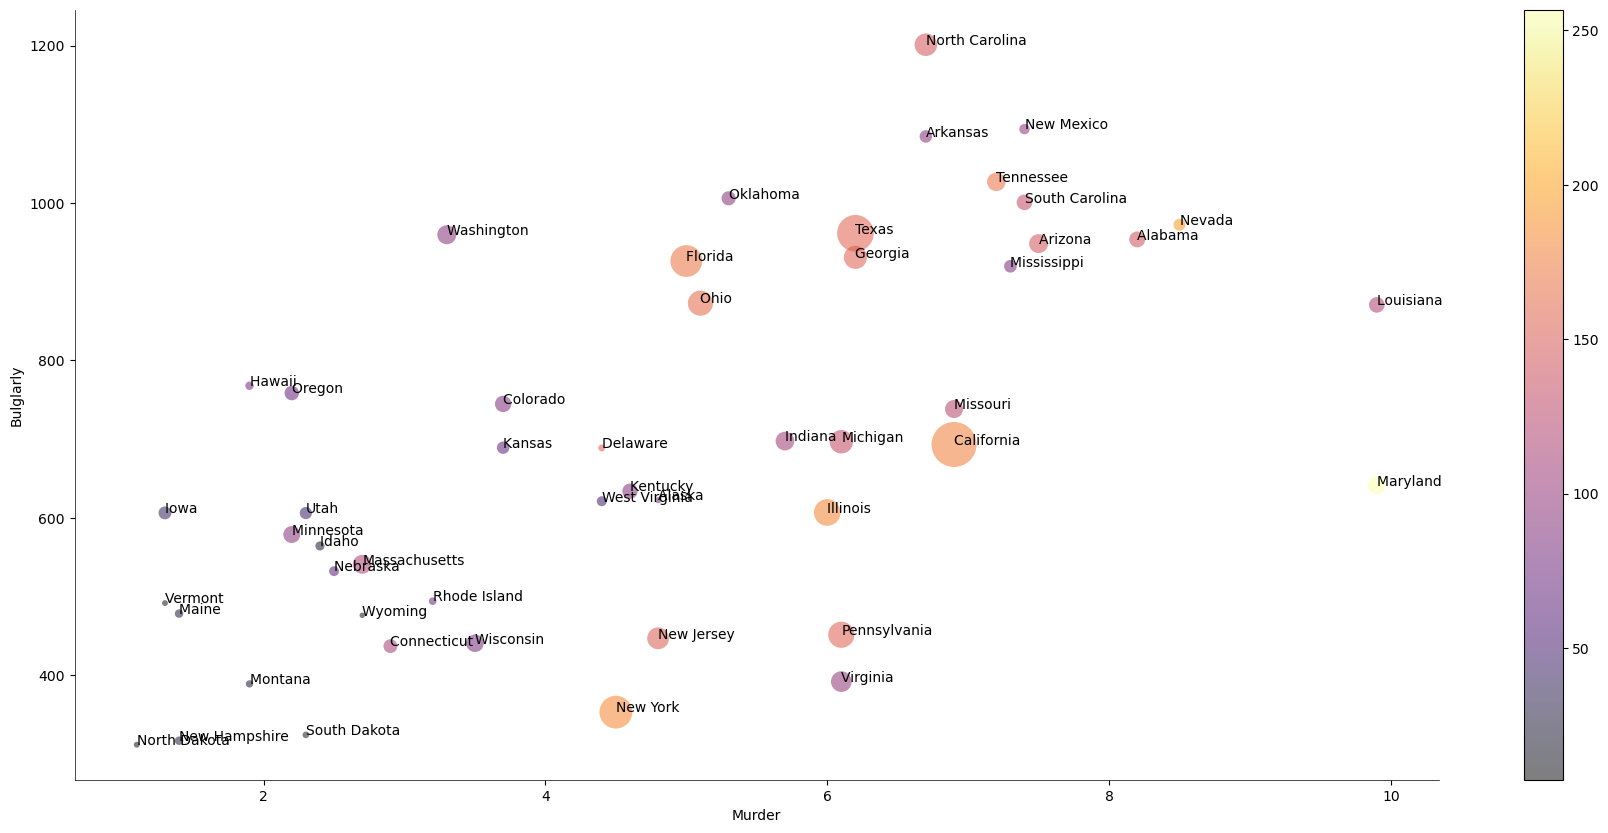

In [23]:
fig, ax = plt.subplots(figsize=(22, 10))

color_graph = ax.scatter(crimes['murder'],
                         crimes['burglary'],
                         s=crimes['population'] / 35000,
                         c=crimes['Robbery'],
                         cmap='inferno',
                         alpha=0.5,
                         linewidth=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

ax.set_xlabel('Murder', fontsize=10)
ax.set_ylabel('Bulglarly', fontsize=10)

for i, state in enumerate(
        crimes['state']
):  # с помощью enumerate создаем из колонок с названиями штатов объект кортежей вида индекс - название штата.
    ax.annotate(
        state, (crimes['murder'][i], crimes['burglary'][i]), fontsize=10
    )  # используем метод annotate, которому говорим, что нужно брать имя штата
    # из кортежа, который создали с помощью enumerate, а координаты подписи задаем через
    # значения наших переменных x и y для нужного индекса из объекта enumerate (обращается к нужному
    # ряду в датафрейме)

plt.colorbar(color_graph)
plt.savefig('crimes.png')  # сохраняем

In [24]:
# смотрим что внутри объекта enumerate()
list(enumerate(crimes['state']))

[(0, 'Alabama '),
 (1, 'Alaska '),
 (2, 'Arizona '),
 (3, 'Arkansas'),
 (4, 'California '),
 (5, 'Colorado '),
 (6, 'Connecticut '),
 (7, 'Delaware '),
 (8, 'Florida '),
 (9, 'Georgia '),
 (10, 'Hawaii '),
 (11, 'Idaho '),
 (12, 'Illinois '),
 (13, 'Indiana '),
 (14, 'Iowa '),
 (15, 'Kansas  '),
 (16, 'Kentucky  '),
 (17, 'Louisiana '),
 (18, 'Maine '),
 (19, 'Maryland '),
 (20, 'Massachusetts'),
 (21, 'Michigan'),
 (22, 'Minnesota '),
 (23, 'Mississippi '),
 (24, 'Missouri '),
 (25, 'Montana  '),
 (26, 'Nebraska '),
 (27, 'Nevada '),
 (28, 'New Hampshire '),
 (29, 'New Jersey'),
 (30, 'New Mexico '),
 (31, 'New York'),
 (32, 'North Carolina '),
 (33, 'North Dakota '),
 (34, 'Ohio '),
 (35, 'Oklahoma '),
 (36, 'Oregon '),
 (37, 'Pennsylvania'),
 (38, 'Rhode Island '),
 (39, 'South Carolina '),
 (40, 'South Dakota '),
 (41, 'Tennessee '),
 (42, 'Texas '),
 (43, 'Utah'),
 (44, 'Vermont '),
 (45, 'Virginia '),
 (46, 'Washington '),
 (47, 'West Virginia '),
 (48, 'Wisconsin '),
 (49, 'Wyom